# 1. Extraction

In [ ]:
import time
import sys
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import re
import matplotlib.pyplot as plt




In [9]:

CATEGORY_URLS = [
    # Electronics
    "https://www.banggood.com/Wholesale-Power-Supply-Module-ca-2288.html?bid=80815&from=nav",
    "https://www.banggood.com/Wholesale-Smart-Module-ca-2286.html?cat_id=2286&direct=0&rec_uid=2693114216|1763835607&bid=80815&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Converter-Board-ca-2295.html?cat_id=2295&direct=0&rec_uid=2693114216|1763835607&bid=80815&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Display-Screen-ca-2293.html?cat_id=2293&page=1&direct=0&rec_uid=2693114216|1763835607&bid=80815&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Battery-Protection-Module-ca-2300.html?cat_id=2300&page=1&direct=0&rec_uid=2693114216|1763835607&bid=80815&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-RF-amplifier-ca-2297.html?bid=80815&from=nav",
    "https://www.banggood.com/Wholesale-Board-and-Shield-ca-2279.html?bid=80815&akmClientCountry=PK&from=nav",

    # Mens Tops
    "https://www.banggood.com/Wholesale-Tops-ca-15002.html?cat_id=15002&page=1&direct=0&rec_uid=2693114216|1763835607&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Shirts-ca-15006.html?cat_id=15006&page=1&direct=0&rec_uid=2693114216|1763835607&bid=81127&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-T-Shirts-ca-15003.html?cat_id=15003&page=1&direct=0&rec_uid=2693114216|1763835607&bid=81127&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Outwear-ca-15014.html?cat_id=15014&page=1&direct=0&rec_uid=2693114216|1763835607&bid=81127&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Two-Pieces-Outfits-ca-18942.html?bid=81127&akmClientCountry=PK&from=nav",
    "https://www.banggood.com/Wholesale-Mens-Accessories-ca-10007.html?bid=81127&from=nav",
    "https://www.banggood.com/Wholesale-Eyewear-and-Accessories-ca-10011.html?bid=81127&akmClientCountry=PK&from=nav",
    "https://www.banggood.com/Wholesale-Mens-Hats-and-Caps-ca-10004.html?bid=81127&akmClientCountry=PK&from=nav"

    # Home Appliance
    "https://www.banggood.com/Wholesale-Coffee,Tea-and-Espresso-ca-9069.html?bid=81113&from=nav",
    "https://www.banggood.com/Wholesale-Household-Appliances-ca-9032.html?cat_id=9032&page=1&direct=0&rec_uid=2693114216|1763835607&bid=81113&sort=1&sortType=desc",
    "https://www.banggood.com/Wholesale-Home-Heaters-ca-18402.html?bid=81113&akmClientCountry=PK&from=nav",
    "https://www.banggood.com/Wholesale-Kitchen-Appliances-ca-9065.html?bid=81113&akmClientCountry=PK&from=nav",
    "https://www.banggood.com/Wholesale-Massage-Appliance-ca-18959.html?bid=81113&akmClientCountry=PK&from=nav",
    "https://www.banggood.com/Wholesale-Juicers-ca-9067.html?bid=81113&from=nav",
    "http://banggood.com/Wholesale-Air-Conditioning-Appliances-ca-9017.html?bid=81113&akmClientCountry=PK&from=nav",

     # Sports and Out Doors
     "https://www.banggood.com/Wholesale-Flashlight-ca-14002.html?bid=80730",
     "https://www.banggood.com/Wholesale-Charger-ca-14012.html?bid=80730&akmClientCountry=PK",
     "https://www.banggood.com/Wholesale-Fishing-and-Hunting-ca-6023.html",
     "https://www.banggood.com/Wholesale-Diving-ca-18309.html?bid=80730",
     "https://www.banggood.com/Wholesale-Bike-HeadLamps-ca-18097.html?bid=80730",
     "https://www.banggood.com/Wholesale-Bike-Parts-and-Components-ca-18099.html?bid=80730&akmClientCountry=PK",
     "https://www.banggood.com/Wholesale-Fitness-Wellness-ca-6016.html?bid=80730",

     # Home and Furniture
     "https://www.banggood.com/Wholesale-Household-Thermometers-c-13213.html?bid=80830",
     "https://www.banggood.com/Wholesale-Pest-Control-Products-ca-12224.html?bid=80830&from=nav",
     "https://www.banggood.com/Wholesale-Decorative-Crafts-ca-12165.html?bid=80830&from=nav",
     "https://www.banggood.com/Wholesale-Kitchen-Tools-ca-12003.html?bid=80830",
     "https://www.banggood.com/Wholesale-Bathroom-Fixture-ca-12286.html?bid=80830&from=nav",
     "https://www.banggood.com/Wholesale-Rain-Gear-ca-18569.html?bid=80830&from=nav",
     "https://www.banggood.com/Wholesale-Bidets-and-Bidet-Parts-ca-12334.html?bid=80830&akmClientCountry=PK&from=nav",
     "https://www.banggood.com/Wholesale-Watering-and-Irrigation-ca-12210.html?bid=80830&from=nav"

]

def check_chrome_driver():
    try:
        driver = webdriver.Chrome()
        driver.quit()
    except Exception as e:
        print(str(e))
        sys.exit(1)

def scrape_banggood_category(url, max_pages=None):
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)

    products = []
    page = 1
    while True:
        driver.get(f"{url}?page={page}")
        time.sleep(3)

        product_cards = driver.find_elements(By.CSS_SELECTOR, "div.p-wrap")
        print(f"[INFO] Found {len(product_cards)} products on page {page}")

        if not product_cards:
            print("[INFO] No more products found, ending this category.")
            break

        for idx, card in enumerate(product_cards, start=1):
            try:
                name_elem = card.find_element(By.CSS_SELECTOR, "a.title")
                name = name_elem.get_attribute("title") or name_elem.text
                prod_url = name_elem.get_attribute("href")
                price_elem = card.find_element(By.CSS_SELECTOR, "span.price-box > span.price")
                price = price_elem.text

                try:
                    reviews_elem = card.find_element(By.CSS_SELECTOR, "a.review")
                    reviews = reviews_elem.text
                except:
                    reviews = None
                try:
                    rating_elem = card.find_element(By.CSS_SELECTOR, "div.prd-sold-review .review-text")
                    rating = rating_elem.text
                except:
                    rating = None
                products.append({
                    "product_name": name,
                    "price": price,
                    "rating": rating,
                    "reviews": reviews,
                    "product_url": prod_url
                })
            except Exception as e:
                print(f"[WARN] Error extracting product #{idx} on page {page}: {e}")

        # Pagination handling
        if max_pages and page >= max_pages:
            print(f"[INFO] Max page limit {max_pages} reached for {url}.")
            break

        # "Next" button handling (auto-continue until finished)
        try:
            next_btn = driver.find_element(By.CSS_SELECTOR, "a.page-next")
            if "disabled" in next_btn.get_attribute("class"):
                print("[INFO] Last page reached for this category.")
                break
        except:
            print("[INFO] Next button not found, ending this category.")
            break

        page += 1

    driver.quit()
    print(f"[INFO] Category completed. Total products scraped: {len(products)}\n")
    return products


In [ ]:
if __name__ == "__main__":
    check_chrome_driver()
    all_products = []
    # max_pages = 3  # Optional: set page limit for test or comment out to scrape all
    for url in CATEGORY_URLS:
        all_products.extend(scrape_banggood_category(url))  # , max_pages
    df = pd.DataFrame(all_products)
    df.to_csv("data/bgd_products.csv", index=False)
    print(f"[INFO] CSV saved: bgdproducts.csv with {len(df)} products!")

In [ ]:
df.head()

# 2. Data Cleaning and Transformtion

In [ ]:
# Load the dataframe
df = pd.read_csv('bgd_products.csv')

# 1. Clean Price
# Extract numeric value (integer or float) from the price string using regex
df['price'] = df['price'].astype(str).str.extract(r'(\d+(?:\.\d+)?)').astype(float)

# 2. Clean Reviews
# Extract digits from the reviews string
df['reviews'] = df['reviews'].astype(str).str.extract(r'(\d+)').astype(float)

# 3. Handle Missing Values
# Price: Median is robust for prices
df['price'] = df['price'].fillna(df['price'].median())

# Reviews: If missing, assume 0
df['reviews'] = df['reviews'].fillna(0)

# Rating: Fill with mean rating
df['rating'] = df['rating'].fillna(df['rating'].mean())

# 4. Create Derived Features
# Feature 1: Name Length
# Define the exchange rate (approximate current rate)
exchange_rate_usd_to_pkr = 282.25

# Create the new feature: price in PKR
df['price_pkr'] = df['price'] * exchange_rate_usd_to_pkr

# Round to 2 decimal places
df['price_pkr'] = df['price_pkr'].round(2)


# Feature 2: Splits data into 3 buckets: Budget, Mid-range, Premium
df['price_tier'] = pd.qcut(df['price'], q=3, labels=['Budget', 'Mid-range', 'Premium'])

# Display results
print(df.head())

df.to_csv('data/cleaned_products_data.csv',index=False)




                                        product_name   price  rating  reviews  \
0  RIDEN RD6030/W 60V 30A DC Voltage Step-down St...  102.99    4.96     53.0   
1  Geekcreit® AC 100-240V to DC 12V 5A 60W Switch...    6.99    4.94   3297.0   
2  XY-SK60 XY-SK120 60W/120W 5A MPPT DC0-36V CC C...   12.17    4.81     43.0   
3  RIDEN® RD6018 RD6018W RD6024 RD6024W RD6030 Di...   35.99    4.86     65.0   
4  RIDEN® 1500W AC110V/220V to DC 68V Regulated S...  102.39    4.84     56.0   

                                         product_url  price_pkr price_tier  
0  https://www.banggood.com/RIDEN-RD6030-or-W-60V...   29068.93    Premium  
1  https://www.banggood.com/Geekcreit-AC-100-240V...    1972.93     Budget  
2  https://www.banggood.com/XY-SK60-XY-SK120-60W-...    3434.98  Mid-range  
3  https://www.banggood.com/RIDEN-RD6018-RD6018W-...   10158.18    Premium  
4  https://www.banggood.com/RIDEN-1500W-AC110V-or...   28899.58    Premium  


# 3. Exploratory Analysis

C:\Users\PMLS\AppData\Local\Temp\ipykernel_42616\1870574654.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_value = df.groupby('price_tier').apply(


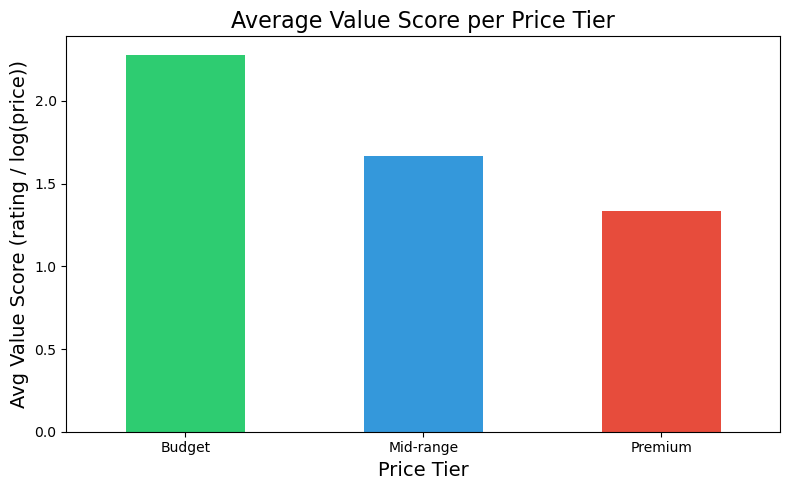

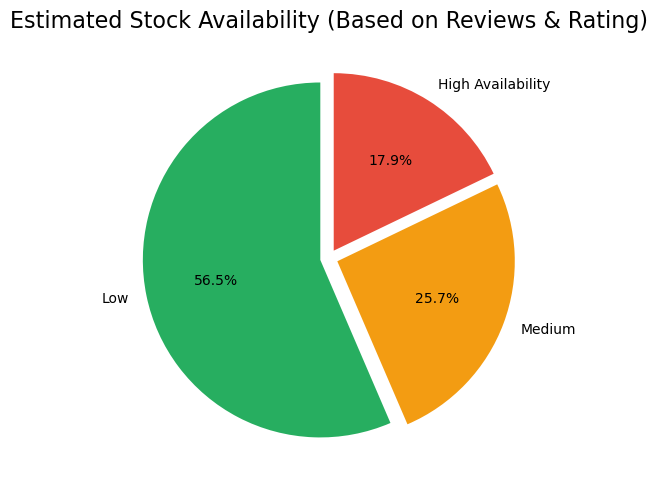

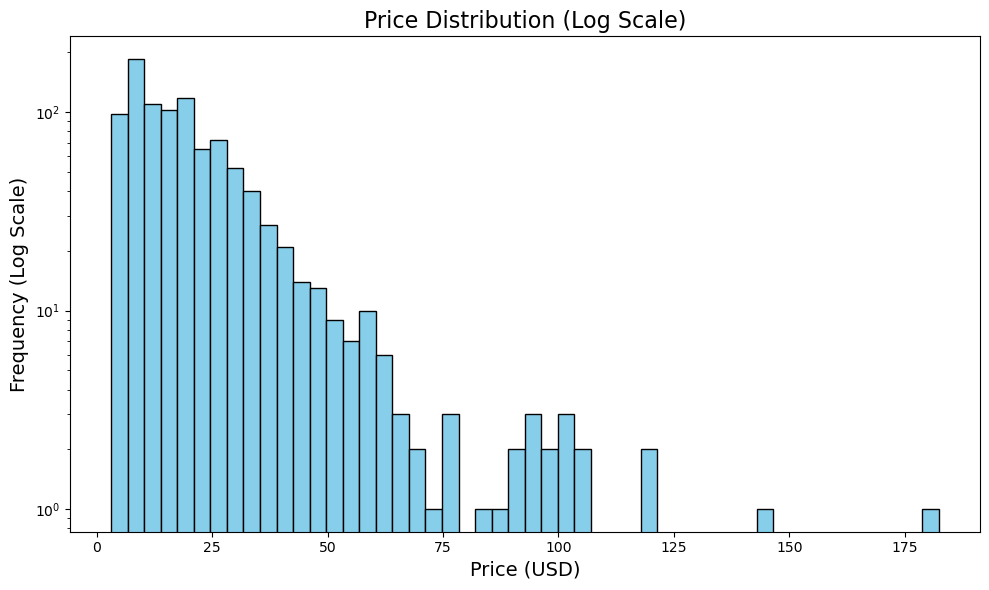

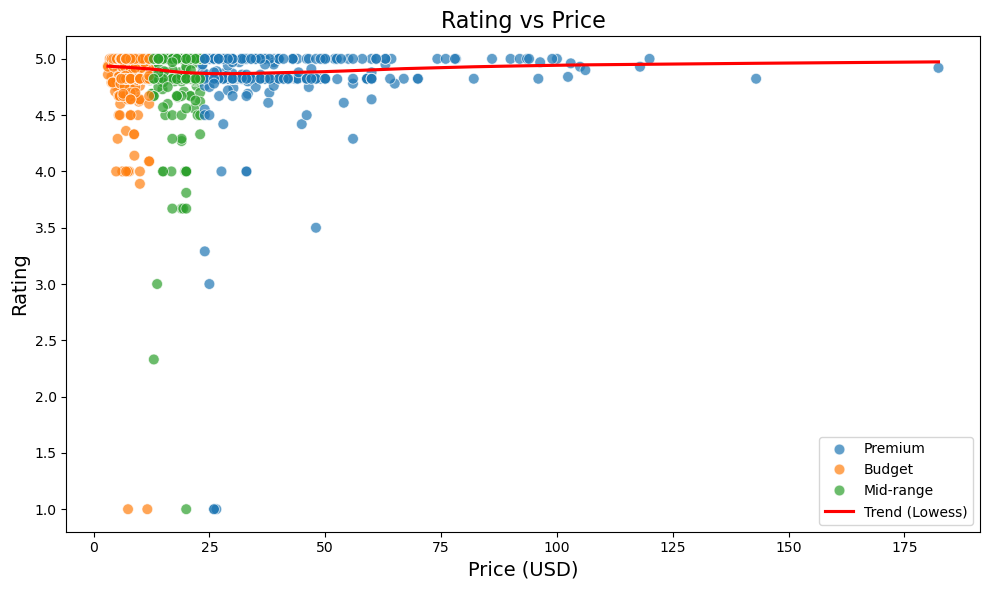

C:\Users\PMLS\AppData\Local\Temp\ipykernel_42616\1870574654.py:91: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


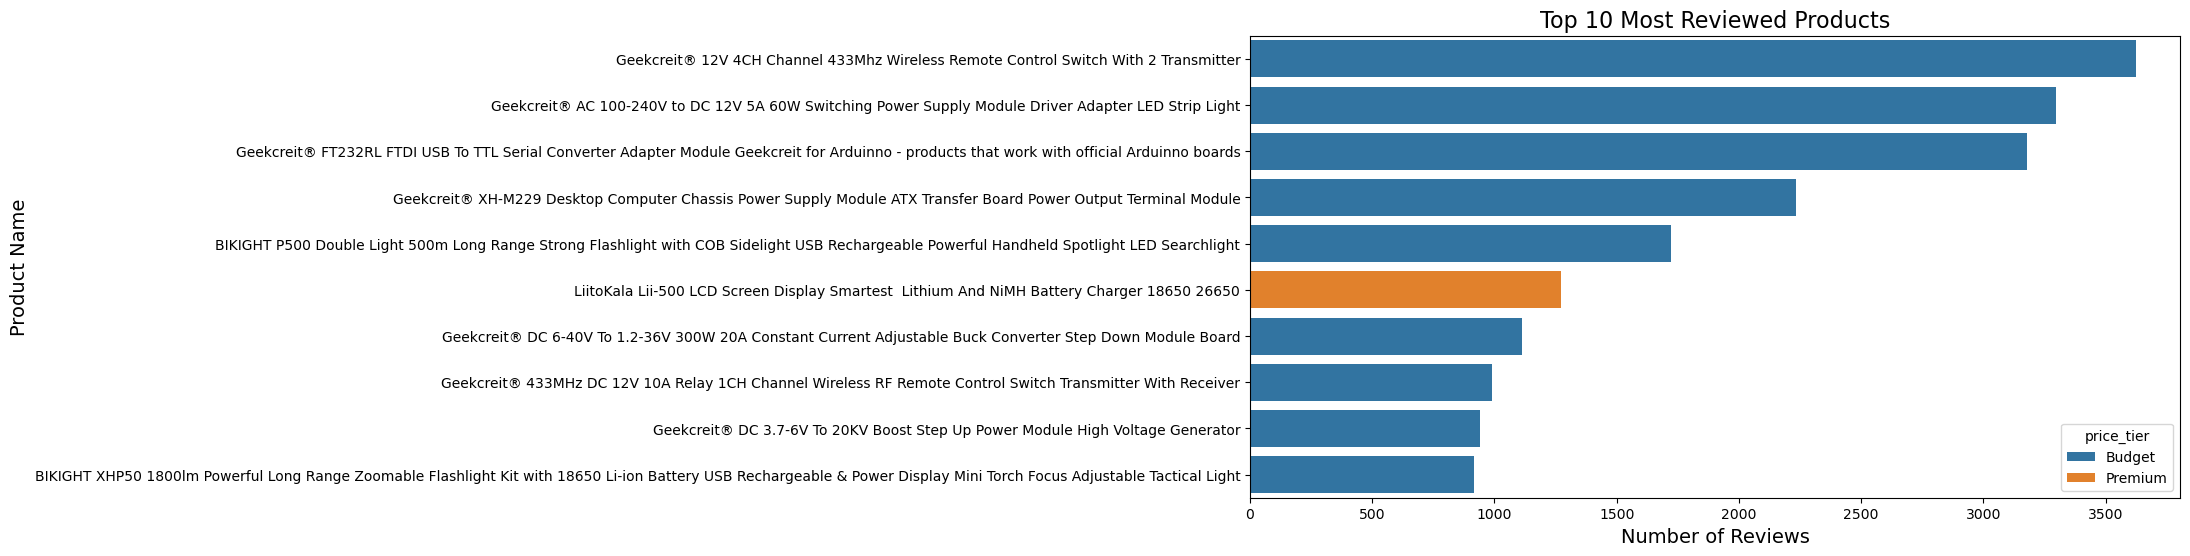

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.rcParams['figure.figsize'] = (12, 7)

# Load the data
df = pd.read_csv("data/cleaned_products_data.csv")


# ----------------------------
# 1. Best Value Metric per Category/Price Tier
# ----------------------------
# Define value = rating / log(price)  -- higher is better value
df['value_score'] = df['rating'] / np.log1p(df['price'])

# Compute top 5 products by value score in each price tier
best_value = df.groupby('price_tier').apply(
    lambda x: x.nlargest(5, 'value_score')[['product_name', 'price', 'rating', 'reviews', 'value_score']]
).reset_index(level=0, drop=False)


# Plot average value score by tier
tier_value = df.groupby('price_tier')['value_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
tier_value.plot(kind='bar', color=['#2ecc71', '#3498db', '#e74c3c'])
plt.title("Average Value Score per Price Tier", fontsize=16)
plt.ylabel("Avg Value Score (rating / log(price))", fontsize=14)
plt.xlabel("Price Tier", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ----------------------------
# 2. Stock Availability Analysis (Proxy via review count & rating)
# ----------------------------
# We assume: high review count + recent-ish (high rating) = likely in stock & popular

df['stock_proxy'] = np.where(
    (df['reviews'] > df['reviews'].quantile(0.75)) & (df['rating'] >= 4.8),
    'High Availability',
    np.where(df['reviews'] > df['reviews'].median(), 'Medium', 'Low')
)

stock_counts = df['stock_proxy'].value_counts()
plt.figure(figsize=(8, 5))
stock_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                  colors=['#27ae60', '#f39c12', '#e74c3c'],
                  explode=(0.05, 0.05, 0.05))
plt.title("Estimated Stock Availability (Based on Reviews & Rating)", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


# 3. Histogram of price (log scale due to skewness)
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.title("Price Distribution (Log Scale)", fontsize=16)
plt.xlabel("Price (USD)", fontsize=14)
plt.ylabel("Frequency (Log Scale)", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Rating vs Price Scatter + Trend
# ----------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="rating", hue="price_tier", alpha=0.7, s=60)
# Fit trend line (lowess for non-linear smoothing)
sns.regplot(data=df, x="price", y="rating", scatter=False, color="red", lowess=True, label="Trend (Lowess)")
plt.title("Rating vs Price", fontsize=16)
plt.xlabel("Price (USD)", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Top Reviewed Products (by number of reviews)
# ----------------------------
top_reviewed = df.nlargest(10, 'reviews')[['product_name', 'reviews', 'rating', 'price', 'price_tier']]
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviewed, x='reviews', y='product_name', hue='price_tier', dodge=False)
plt.title("Top 10 Most Reviewed Products", fontsize=16)
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.tight_layout()
plt.show()




# 4. Data Load to SQL

In [ ]:
import pandas as pd
import pyodbc

# Set your cleaned CSV file
df = pd.read_csv("data/cleaned_products_data.csv")

# --- SQL Server Connection parameters ---
server = 'localhost'                  # ya IP
database = 'BANGGOOD'          # apna DB ka actual naam
username = 'sa'                       # apna SQL user
password = 'shahg1234'                     # apna password

# --- Establish Connection ---
conn = pyodbc.connect(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}',
    timeout=10
)
cursor = conn.cursor()
print("[INFO] Connected to SQL Server!")

# --- Optional: Create table if not exists (run only once) ---
cursor.execute("""
IF OBJECT_ID('dbo.BanggoodProducts', 'U') IS NULL
BEGIN
   CREATE TABLE dbo.BanggoodProducts (
        product_name NVARCHAR(255),
        price FLOAT,
        rating FLOAT,
        reviews FLOAT,
        product_url NVARCHAR(MAX),
        price_pkr FLOAT,
        price_tier NVARCHAR(50)
   )
END
""")
conn.commit()

# --- Insert Data ---
for idx, row in df.iterrows():
    try:
        cursor.execute("""
            INSERT INTO dbo.BanggoodProducts
            (product_name, price, rating, reviews, product_url, price_pkr, price_tier)
            VALUES (?, ?, ?, ?, ?, ?, ?)
        """,
        row['product_name'],
        float(row['price']) if pd.notnull(row['price']) else None,
        float(row['rating']) if pd.notnull(row['rating']) else None,
        float(row['reviews']) if pd.notnull(row['reviews']) else None,
        row['product_url'],
        float(row['price_pkr']) if pd.notnull(row['price_pkr']) else None,
        row['price_tier']
        )
    except Exception as e:
        print(f"[WARN] Insertion failed at row {idx}: {e}")

conn.commit()
print("[INFO] Data inserted successfully!")

# --- Row count validation ---
cursor.execute("SELECT COUNT(*) FROM dbo.BanggoodProducts")
print("Rows in SQL table:", cursor.fetchone()[0])

cursor.close()
conn.close()

[INFO] Connected to SQL Server!
[INFO] Data inserted successfully!
Rows in SQL table: 974
